stock-market-predict

https://www.youtube.com/watch?v=1O_BenficgE&list=PLf-K7PwZdG0MxYVhh5VGApJMYZPYOmTA5&index=12&t=90s

https://github.com/dataquestio/project-walkthroughs/blob/master/sp_500/market_prediction.ipynb

VE = homl (for Hands On Machine Learning with Scikit-Learn & TensorFlow)

In [1]:
import yfinance as yf
import pandas as pd
import os

In [2]:
if os.path.exists("sp500.csv"):
    sp500 = pd.read_csv("sp500.csv", index_col=0)
else:
    sp500 = yf.Ticker("^GSPC")  # get the data if it's not on PC
    sp500 = sp500.history(period="max")
    sp500.to_csv("sp500.csv")

## Explore & clean

In [3]:
sp500  # Pandas dataframe

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-08-14 00:00:00-04:00,4458.129883,4490.330078,4453.439941,4489.720215,3896410000,0.0,0.0
2023-08-15 00:00:00-04:00,4478.870117,4478.870117,4432.189941,4437.859863,3832250000,0.0,0.0
2023-08-16 00:00:00-04:00,4433.790039,4449.950195,4403.549805,4404.330078,3753910000,0.0,0.0


In [4]:
sp500.index  # datetime index

Index(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
       '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
       '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
       '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
       '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
       ...
       '2023-08-07 00:00:00-04:00', '2023-08-08 00:00:00-04:00',
       '2023-08-09 00:00:00-04:00', '2023-08-10 00:00:00-04:00',
       '2023-08-11 00:00:00-04:00', '2023-08-14 00:00:00-04:00',
       '2023-08-15 00:00:00-04:00', '2023-08-16 00:00:00-04:00',
       '2023-08-17 00:00:00-04:00', '2023-08-18 00:00:00-04:00'],
      dtype='object', name='Date', length=24023)

<AxesSubplot:xlabel='Date'>

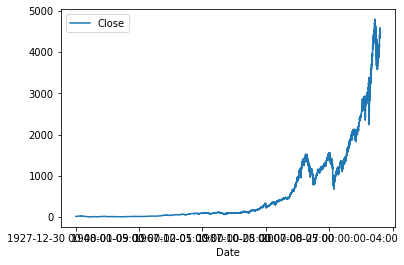

In [5]:
sp500.plot.line(y="Close", use_index=True)

In [6]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [7]:
sp500

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2023-08-14 00:00:00-04:00,4458.129883,4490.330078,4453.439941,4489.720215,3896410000
2023-08-15 00:00:00-04:00,4478.870117,4478.870117,4432.189941,4437.859863,3832250000
2023-08-16 00:00:00-04:00,4433.790039,4449.950195,4403.549805,4404.330078,3753910000


## Set up target for ML; will the stock go up or down?

In [8]:
# Make a new column = closing price on next day (we have historic data)
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-08-14 00:00:00-04:00,4458.129883,4490.330078,4453.439941,4489.720215,3896410000,4437.859863
2023-08-15 00:00:00-04:00,4478.870117,4478.870117,4432.189941,4437.859863,3832250000,4404.330078
2023-08-16 00:00:00-04:00,4433.790039,4449.950195,4403.549805,4404.330078,3753910000,4370.359863


In [9]:
# Check: is tomorrow price > today price
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-08-14 00:00:00-04:00,4458.129883,4490.330078,4453.439941,4489.720215,3896410000,4437.859863,0
2023-08-15 00:00:00-04:00,4478.870117,4478.870117,4432.189941,4437.859863,3832250000,4404.330078,0
2023-08-16 00:00:00-04:00,4433.790039,4449.950195,4403.549805,4404.330078,3753910000,4370.359863,0


In [10]:
# Ignore old data before 1990
sp500 = sp500.loc["1990-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-08-14 00:00:00-04:00,4458.129883,4490.330078,4453.439941,4489.720215,3896410000,4437.859863,0
2023-08-15 00:00:00-04:00,4478.870117,4478.870117,4432.189941,4437.859863,3832250000,4404.330078,0
2023-08-16 00:00:00-04:00,4433.790039,4449.950195,4403.549805,4404.330078,3753910000,4370.359863,0


## Train an initial ML model

In [12]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]  # all except last 100 rows
test = sp500.iloc[-100:]  # last 100 rows

predictors = ["Close", "Volume", "Open", "High", "Low"]

model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [13]:
# What % of time when we said market would go up, did it actually go up?
from sklearn.metrics import precision_score

preds = model.predict(test[predictors]) # a NumPy array

In [15]:
# Want it as a Pandas Series
import pandas as pd

preds = pd.Series(preds, index=test.index)  # index same as test df

In [17]:
precision_score(test["Target"], preds)

0.546875

Not great precision, only goes up 54% of time when we predict it will. Now add preds to the test df and plot the Target versus our predictions.

<AxesSubplot:xlabel='Date'>

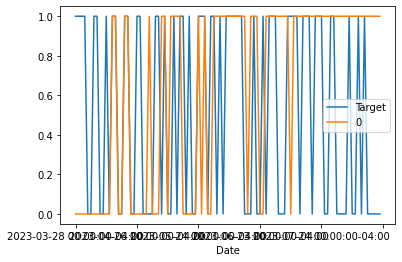

In [19]:
combined = pd.concat([test["Target"], preds], axis=1)  # combine as columns
combined.plot()

## Building a backtesting system
***
We want to test our model against historical data, not just the last 100 days.

In [20]:
## Combine all the steps we've done into a single function
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [21]:
# Train first model on about 10 years of data (2500 days), and step=250 means train modl for about a year
# Train on first 10 years, predict 11th year
# Then train on first 11 years, predict 12th
# Train on first 12 years, predict 13th  and so on

def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []  # list of df, each df = predictions for a single year

    for i in range(start, data.shape[0], step):  # loop through data year by year
        train = data.iloc[0:i].copy()  # train = all years prior to current year
        test = data.iloc[i:(i+step)].copy()  # test = currect year
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [22]:
predictions = backtest(sp500, model, predictors)